Stephanie Leroux
2020-06-26



### MAPS of the hourly SSH and SSH diff between two members

* Memo of the 3 20-members experiments i have so far:
    - GSL14: Stochastic STD of 1%, exp starting in Feb 2010
    - GSL15: Stochastic STD of 5%, exp starting in Feb 2010
    - GSL16: Stochastic STD of 1%, exp starting in Aug 2010

# Load packages

In [1]:
## standart libraries
import os,sys
import numpy as np

from scipy.signal import argrelmax
from scipy.stats import linregress

# xarray
import xarray as xr

# plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors

import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cmocean

# custom tools
import lib_medwest60 as slx

%matplotlib inline 

# Read data

In [2]:
varna="sossheig"
typ="gridT-2D"
naexp="STD5%"
CONFIGCASE='MEDWEST60-GSL15'
ens='ens01'
machine='CAL1'
nav_lat_ref,nav_lon_ref,mask,ssh,varname,latexvarname=slx.readallmbs(machine=machine,NMBtot=2,typ=typ,varna=varna,CONFIGCASEmed=CONFIGCASE,ens=ens)
ssh.attrs['experiment_short_name'] =  naexp


/mnt/meom/workdir/lerouste/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
001MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc
/mnt/meom/workdir/lerouste/MEDWEST60/MEDWEST60-GSL15-S/ens01/1h/gridT-2D/
002MEDWEST60-GSL15-ens01_1h_*gridT-2D_*.nc


In [32]:
ssh

<xarray.DataArray 'sossheig' (e: 2, time_counter: 720, y: 803, x: 883)>
dask.array<shape=(2, 720, 803, 883), dtype=float32, chunksize=(1, 24, 803, 883)>
Coordinates:
    nav_lat        (y, x) float32 35.0235 35.0233 35.0232 35.023 35.0229 ...
    nav_lon        (y, x) float32 -5.68308 -5.66638 -5.64969 -5.63299 ...
    time_centered  (time_counter) datetime64[ns] 2010-02-05T00:30:00 ...
  * time_counter   (time_counter) datetime64[ns] 2010-02-05T00:30:00 ...
Dimensions without coordinates: e, y, x
Attributes:
    standard_name:       sea_surface_height_above_geoid
    long_name:           sea surface height
    units:               m
    online_operation:    average
    interval_operation:  80 s
    interval_write:      1 h
    cell_methods:        time: mean (interval: 80 s)

# plot one member SSH FIELD

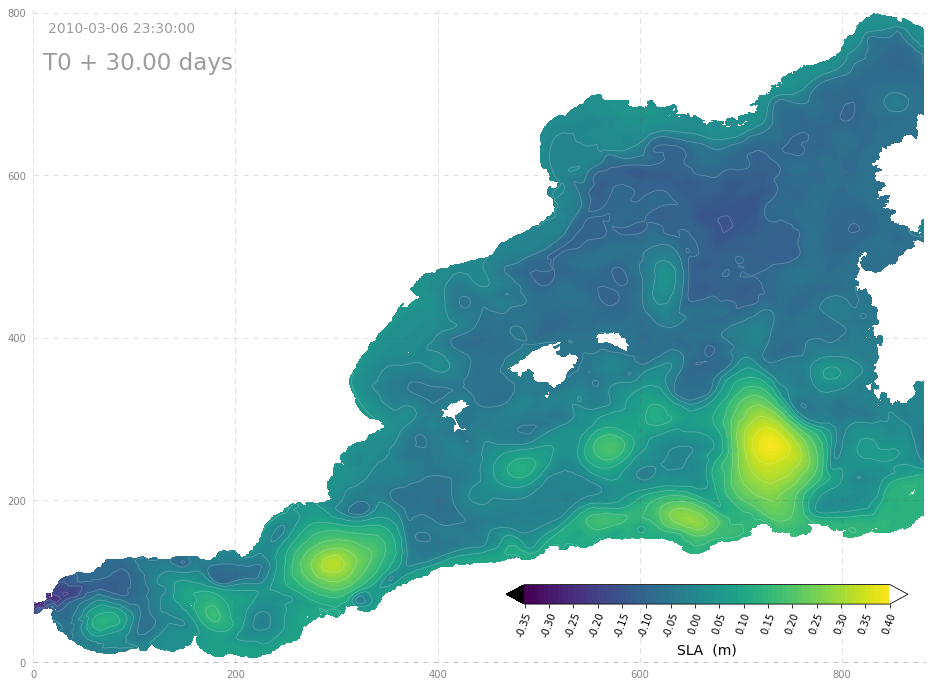

In [52]:
gstyle='lightstyle'
plto = varname+"_"+CONFIGCASE+"-"+ens+"_mb002"    
#diro='/Users/leroux/DATA/RES/MEDWEST60_RES/'
diro='/mnt/meom/workdir/lerouste/MEDWEST60/DIAGS/jun26/'

#### for it in range(0,SSH_el.time_counter.size-1):
#for it in range(10,11,6):
for it in range(719,720,6):    
    #====================================
    # data to plot 
    tdate=ssh.time_counter.to_index()[it]
    iday = (it+1)/24.
    tdelta="T0 + "+str('%.2f'%(iday))+" days"
    tformat="%.3f"
    thr=0.4
    
    data2plot = ssh.isel(e=1,time_counter=it)
                            
    #data2plot = data2plot.where(mask.isel(z=0)>0).squeeze().to_masked_array()
    data2plot = data2plot.where(mask.isel(z=0)>0)
    data2plot = data2plot - data2plot.where(mask.isel(z=0)>0).stack(z=('x', 'y')).mean(dim='z')
    data2plot = data2plot.squeeze().to_masked_array()
    
    
    namo = plto+'_'+str(it)+'.png'


    #========= Plot settings ===============
    levbounds=[-0.35,0.41,0.01]
    
    # customed colormap
   
    cmap,norm = slx.mycolormap(levbounds,cm_base='viridis',cu='k',co='w')
   


    #========= PLOT ===============
    fig3,(ax) = plt.subplots(1, 1, figsize=[16, 12],facecolor='w')

    # main plot
    cs,ax = slx.plotmapMEDWEST_gp(fig3,ax,data2plot,cmap,norm,plto=plto,gridpts=True,gridptsgrid=True,gstyle=gstyle)
    cs2   = ax.contour(data2plot,alpha=0.3,colors='#FAFAFA',linestyles="-",linewidths=0.6,levels=np.arange(-0.6,0.7,0.05))
    
    lalpha=0.2
    lwidthgrid=1.
    gridinc=200
    lstylegrid=(0, (5, 5))
    if (gstyle=='lightstyle'):
            cmap.set_bad('w')
            lcolorgrid="#585858" # "#D8D8D8"
            tcolorgrid='#848484'#"#848484"            

    #ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(gridinc))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(gridinc))   
    ax.tick_params(axis='x', colors=tcolorgrid)
    ax.tick_params(axis='y', colors=tcolorgrid)
    ax.grid(which='major',linestyle=lstylegrid,color=lcolorgrid,alpha=lalpha,linewidth=lwidthgrid)
    ax.axhline(y=1.,xmin=0, xmax=883,zorder=10,color=lcolorgrid,linewidth=lwidthgrid,linestyle=lstylegrid,alpha=lalpha )
    
    # add date
    tcolordate="848484"
    tsizedate=14
    
    ax.annotate(tdate,xy=(15,775),xycoords='data', color=tcolordate,size=tsizedate)
    plt.axhline(y=350.,xmin=200, xmax=400,zorder=10,color='r',linewidth=3,linestyle='-',alpha=1 )
    #plt.annotate(tdelta,xy=(15,750),xycoords='data', color=tcolordate,size=tsizedate)
    plt.annotate(tdelta,xy=(10,730),xycoords='data', color=tcolordate,size=23)
       
    
    # add colorbar
    cbon=True
    if cbon:
        tlabel="SLA "+slx.textunit(varname)
        cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=5,tformat="%.2f",
                             tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                            bbta=(0.08, -0.08,0.9,0.2))
    
                                       
        
    
    #plt.figimage(ON_res , 700, 630, zorder=10,alpha=1) 
    
    # display only once
    #if it==10:
    #    plt.show()
    plt.show()
         
    # Save fig in png, resolution dpi    
    slx.saveplt(fig3,diro,namo,dpifig=300)
    plt.close(fig3)

In [ ]:
varna="sosst"
typ="gridT-2D"
naexp="STD5%"
CONFIGCASE='MEDWEST60-GSL15'
ens='ens01'
machine='CAL1'
nav_lat_ref,nav_lon_ref,mask,ssh,varname,latexvarname=slx.readallmbs(machine=machine,NMBtot=2,typ=typ,varna=varna,CONFIGCASEmed=CONFIGCASE,ens=ens)
ssh.attrs['experiment_short_name'] =  naexp


In [ ]:
gstyle='lightstyle'
plto = varname+"_"+CONFIGCASE+"-"+ens+"_mb002"    
#diro='/Users/leroux/DATA/RES/MEDWEST60_RES/'
diro='/mnt/meom/workdir/lerouste/MEDWEST60/DIAGS/jun26/'

#### for it in range(0,SSH_el.time_counter.size-1):
#for it in range(10,11,6):
for it in range(719,720,6):    
    #====================================
    # data to plot 
    tdate=ssh.time_counter.to_index()[it]
    iday = (it+1)/24.
    tdelta="T0 + "+str('%.2f'%(iday))+" days"
    tformat="%.3f"
    thr=0.4
    
    data2plot = ssh.isel(e=1,time_counter=it)
                            
    #data2plot = data2plot.where(mask.isel(z=0)>0).squeeze().to_masked_array()
    data2plot = data2plot.where(mask.isel(z=0)>0)
    data2plot = data2plot - data2plot.where(mask.isel(z=0)>0).stack(z=('x', 'y')).mean(dim='z')
    data2plot = data2plot.squeeze().to_masked_array()
    
    
    namo = plto+'_'+str(it)+'.png'


    #========= Plot settings ===============
    levbounds=[-0.35,0.41,0.01]
    
    # customed colormap
   
    cmap,norm = slx.mycolormap(levbounds,cm_base='viridis',cu='k',co='w')
   


    #========= PLOT ===============
    fig3,(ax) = plt.subplots(1, 1, figsize=[16, 12],facecolor='w')

    # main plot
    cs,ax = slx.plotmapMEDWEST_gp(fig3,ax,data2plot,cmap,norm,plto=plto,gridpts=True,gridptsgrid=True,gstyle=gstyle)
    cs2   = ax.contour(data2plot,alpha=0.3,colors='#FAFAFA',linestyles="-",linewidths=0.6,levels=np.arange(-0.6,0.7,0.05))
    
    lalpha=0.2
    lwidthgrid=1.
    gridinc=200
    lstylegrid=(0, (5, 5))
    if (gstyle=='lightstyle'):
            cmap.set_bad('w')
            lcolorgrid="#585858" # "#D8D8D8"
            tcolorgrid='#848484'#"#848484"            

    #ax = plt.gca()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(gridinc))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(gridinc))   
    ax.tick_params(axis='x', colors=tcolorgrid)
    ax.tick_params(axis='y', colors=tcolorgrid)
    ax.grid(which='major',linestyle=lstylegrid,color=lcolorgrid,alpha=lalpha,linewidth=lwidthgrid)
    ax.axhline(y=1.,xmin=0, xmax=883,zorder=10,color=lcolorgrid,linewidth=lwidthgrid,linestyle=lstylegrid,alpha=lalpha )
    
    # add date
    tcolordate="848484"
    tsizedate=14
    
    ax.annotate(tdate,xy=(15,775),xycoords='data', color=tcolordate,size=tsizedate)
    plt.axhline(y=350.,xmin=200, xmax=400,zorder=10,color='r',linewidth=3,linestyle='-',alpha=1 )
    #plt.annotate(tdelta,xy=(15,750),xycoords='data', color=tcolordate,size=tsizedate)
    plt.annotate(tdelta,xy=(10,730),xycoords='data', color=tcolordate,size=23)
       
    
    # add colorbar
    cbon=True
    if cbon:
        tlabel="SLA "+slx.textunit(varname)
        cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=5,tformat="%.2f",
                             tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                            bbta=(0.08, -0.08,0.9,0.2))
    
                                       
        
    
    #plt.figimage(ON_res , 700, 630, zorder=10,alpha=1) 
    
    # display only once
    #if it==10:
    #    plt.show()
    plt.show()
         
    # Save fig in png, resolution dpi    
    slx.saveplt(fig3,diro,namo,dpifig=300)
    plt.close(fig3)